In [23]:
import requests, bs4
from bs4 import BeautifulSoup as bs
import pandas as pd
import os
from selenium import webdriver

In [24]:
chromedriver = '/Applications/chromedriver'
os.environ["webdriver.chrome.driver"] = \
    chromedriver

driver = webdriver.Chrome(chromedriver)

Scrapping World Bankdata

In [25]:
worldBank_indicators = [{"indicator_id": "NY.GDP.MKTP.CD", "indicator_name": "gdp"},
                        {"indicator_id": "EN.ATM.CO2E.KT", "indicator_name": "c02"},
                        {"indicator_id": "SH.MED.BEDS.ZS", "indicator_name": "hospital_beds"},
                        {"indicator_id": "NY.GNP.PCAP.CD", "indicator_name": "gni"},
                        {"indicator_id": "HD.HCI.OVRL", "indicator_name": "hdi"},
                        {"indicator_id": "SP.DYN.LE00.IN", "indicator_name": "life_expectancy"},
                        {"indicator_id": "SH.DTH.COMM.ZS", "indicator_name": "death_malnutrition"},
                        {"indicator_id": "SE.XPD.TOTL.GD.ZS", "indicator_name": "education_dgp"}]

#GNI Stands for Gross national income per capita
#C02 Emmissions (Metrics tons per capita)
#Hospital Beds (per 1,000 people)
#HDI stands for Human Development Index
#GDP Gross domestic product

In [26]:
countries_dict = {}

In [27]:
def checkKey(dict, key):
    if key in dict.keys():
        return True
    else:
        return False

def getWorldBankData(soup):
    extracted_data = []
    tableRows = soup.find_all(class_="item")
    tableRows.pop(0) 
    for div in tableRows:
        country = div.contents[0].find('a').string
        value = div.contents[2].string
        if value:
            value = value.replace(',', '')
        extracted_data.append({'country': country, 'dataValue': value})
    return extracted_data

def insertWorldBankIndicator(data, indicator):
    for item in data:
        country = item['country']
        indicatorValue = item['dataValue']
        if checkKey(countries_dict, country) == False:
            countries_dict[country] = {}
            
        countries_dict[country][indicator] = indicatorValue
        
for indicator in worldBank_indicators:
    url = 'https://data.worldbank.org/indicator/'+indicator["indicator_id"]
    driver.get(url)
    soup = bs(driver.page_source)
    insertWorldBankIndicator(getWorldBankData(soup), indicator["indicator_name"])
    

In [17]:
df = pd.DataFrame.from_dict(countries_dict, orient='index')
# df = df[df['life_expectancy'].notna()]
# df = df.dropna()
# df = df[:"Zimbabwe"]

In [18]:
df = df.apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 169 entries, Afghanistan to Zimbabwe
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gdp              169 non-null    float64
 1   c02              169 non-null    int64  
 2   hospital_beds    169 non-null    float64
 3   gni              169 non-null    int64  
 4   hdi              169 non-null    float64
 5   life_expectancy  169 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 9.2+ KB


In [16]:
df.head(100)

,gdp,c02,hospital_beds,gni,hdi,life_expectancy
Afghanistan,19807.07,7440.0,0.4,500.0,0.4,65.0
Albania,14799.62,5560.0,2.9,5210.0,0.6,79.0
Algeria,145163.90,151670.0,1.9,3550.0,0.5,77.0
American Samoa,638.00,NaN,NaN,NaN,NaN,NaN
Andorra,3155.07,460.0,2.5,NaN,NaN,NaN
...,...,...,...,...,...,...
Israel,401953.80,61970.0,3.0,43070.0,0.7,83.0
Italy,1886445.27,324850.0,3.1,32200.0,0.7,83.0
Jamaica,13812.42,8510.0,1.7,4620.0,0.5,74.0
Japan,5064872.88,1106150.0,13.0,41580.0,0.8,84.0


Getting Inmunization Data

In [24]:
bcg_df = pd.read_csv('bcg.csv')
bcg_dict = bcg_df[["country", "2019"]].to_dict('records')

dtp3_df = pd.read_csv('dtp3.csv')
dtp3_dict = dtp3_df[["country", "2019"]].to_dict('records')

hepb_df = pd.read_csv('hepb.csv')
hepb_dict = hepb_df[["country", "2019"]].to_dict('records')

def insertInmunizationIndicator(inmunization_dict, indicator):
    for item in inmunization_dict:
        country = item["country"]
        indicatorValue = item["2019"]
        if checkKey(countries_dict, country) == True:
            countries_dict[country][indicator] = indicatorValue

insertInmunizationIndicator(bcg_dict, "bcg")
insertInmunizationIndicator(dtp3_dict, "dtp3")
insertInmunizationIndicator(hepb_dict, "hepb")

In [ ]:
Getting 

In [44]:
df = pd.DataFrame.from_dict(countries_dict, orient='index')
df = df.apply(pd.to_numeric)
df = df.dropna()
df = df[:"Zimbabwe"]
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 111 entries, Afghanistan to Zimbabwe
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gdp                 111 non-null    float64
 1   c02                 111 non-null    float64
 2   hospital_beds       111 non-null    float64
 3   gni                 111 non-null    float64
 4   hdi                 111 non-null    float64
 5   life_expectancy     111 non-null    float64
 6   death_malnutrition  111 non-null    float64
 7   education_dgp       111 non-null    float64
 8   bcg                 111 non-null    float64
 9   dtp3                111 non-null    float64
 10  hepb                111 non-null    float64
dtypes: float64(11)
memory usage: 10.4+ KB


<AxesSubplot:>

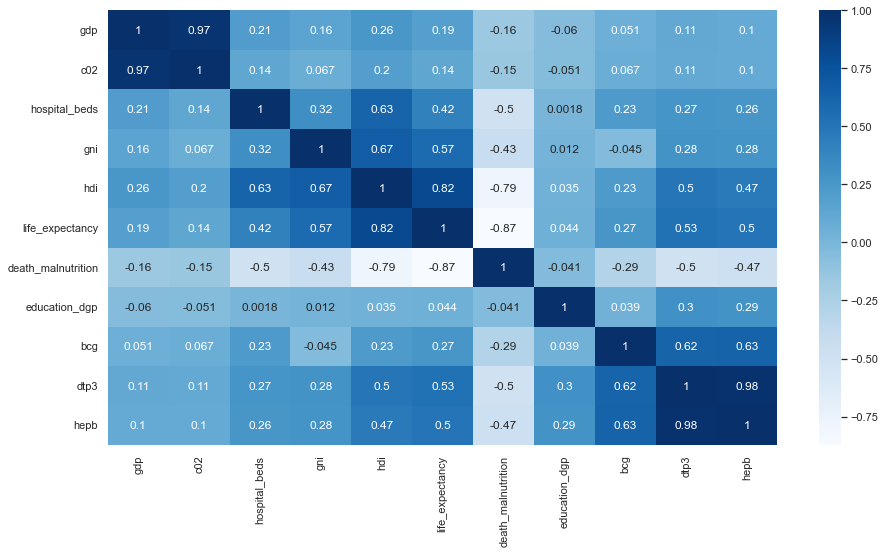

In [51]:
import seaborn as sns
%matplotlib inline
corr = df.corr()

# plot the heatmap
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap="Blues", annot=True)


In [69]:
import statsmodels.api as sm
Y = df["life_expectancy"]
x = df.drop(columns = ['life_expectancy'])
x = sm.add_constant(x)
model = sm.OLS(Y,x, data=df)
model.fit().summary()

/Users/xavierpaez/opt/anaconda3/envs/metis/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     58.67
Date:                Tue, 12 Oct 2021   Prob (F-statistic):           2.48e-37
Time:                        22:58:01   Log-Likelihood:                -265.95
No. Observations:                 111   AIC:                             553.9
Df Residuals:                     100   BIC:                             583.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 64.4710      3.467     18.593      0.000      57.592      71.350
gdp                 2.776e-06   8.31e-07      3.342      0.001    1.13e-06    4.42e-06
c02                 -4.02e-06   1.21e-06     -3.335      0.001   -6.41e-06   -1.63e-06
hospital_beds         -0.5832      0.159     -3.677      0.000      -0.898      -0.269
gni                 5.723e-05   3.82e-05      1.497      0.138   -1.86e-05       0.000
hdi                   17.1210      5.213      3.284      0.001       6.779      27.463
death_malnutrition    -0.2359      0.024     -9.963      0.000      -0.283      -0.189
education_dgp         -0.0224      0.163     -0.138      0.891      -0.346       0.301
bcg                    0.0128      0.030      0.425      0.672      -0.047       0.073
dtp3                  -0.0611      0.111     -0.549      0.584      -0.282       0.160
hepb                   0.0920      0.105      0.873      0.385      -0.117       0.301
==============================================================================
Omnibus:                       12.633   Durbin-Watson:                   2.259
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               17.859
Skew:                          -0.564   Prob(JB):                     0.000132
Kurtosis:                       4.609   Cond. No.                     4.01e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.01e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
model = sm.OLS(Y,x)
fit = model.fit()
vif = pd.DataFrame()
vif['variables'] = x.columns
vif['vif'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif

,variables,vif
0,const,170.367440
1,gdp,21.717217
2,c02,21.076441
3,hospital_beds,1.926241
4,gni,2.345336
5,hdi,5.633137
6,death_malnutrition,2.978614
7,education_dgp,1.201785
8,bcg,1.991575
9,dtp3,30.935217


In [73]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     58.67
Date:                Tue, 12 Oct 2021   Prob (F-statistic):           2.48e-37
Time:                        23:03:39   Log-Likelihood:                -265.95
No. Observations:                 111   AIC:                             553.9
Df Residuals:                     100   BIC:                             583.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 64.4710      3.467     18.593      0.000      57.592      71.350
gdp                 2.776e-06   8.31e-07      3.342      0.001    1.13e-06    4.42e-06
c02                 -4.02e-06   1.21e-06     -3.335      0.001   -6.41e-06   -1.63e-06
hospital_beds         -0.5832      0.159     -3.677      0.000      -0.898      -0.269
gni                 5.723e-05   3.82e-05      1.497      0.138   -1.86e-05       0.000
hdi                   17.1210      5.213      3.284      0.001       6.779      27.463
death_malnutrition    -0.2359      0.024     -9.963      0.000      -0.283      -0.189
education_dgp         -0.0224      0.163     -0.138      0.891      -0.346       0.301
bcg                    0.0128      0.030      0.425      0.672      -0.047       0.073
dtp3                  -0.0611      0.111     -0.549      0.584      -0.282       0.160
hepb                   0.0920      0.105      0.873      0.385      -0.117       0.301
==============================================================================
Omnibus:                       12.633   Durbin-Watson:                   2.259
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               17.859
Skew:                          -0.564   Prob(JB):                     0.000132
Kurtosis:                       4.609   Cond. No.                     4.01e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.01e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
lr = model.fit(x, Y)
r_squared = lr.score(x,Y)
print(r_squared)

0.8543762567815538
